In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import fsolve
from astropy import units as u

plt.style.use('pablet')

In [2]:
H0= 70*u.km/u.s/u.Mpc
Om0= 0.3
Ode0= 0.7

In [3]:
def integrand(z, M, DE): #lookback time
    c= (1+z)
    return 1/(c*np.sqrt(M*c**3+DE))

I= quad(integrand, 0, np.inf, args=(Om0, Ode0))

now= (1/H0*I[0]).to(u.Gyr)
print('Age of the universe:', now)

Age of the universe: 13.466983947061877 Gyr


In [9]:
def age(z, H0):
    I= quad(integrand, z, np.inf, args=(Om0, Ode0))
    universe= 1/H0*I[0]
    return  universe.to(u.Gyr)

z= 0.1
universe= age(z, H0)

print(f'Age of the universe at z={z}:',universe)

Age of the universe at z=0.1: 12.165686389516978 Gyr


In [5]:
def half_age(z):
    return age(z, H0)-now/2

half= fsolve(half_age, 1)[0]
print('Half of the age of the universe at redshift:', half)

print('\nAge of the universe:', now)
print('Half of the age of the universe:', age(half, H0))

Half of the age of the universe at redshift: 0.7812333871333947

Age of the universe: 13.466983947061877 Gyr
Half of the age of the universe: 6.7334919735309375 Gyr


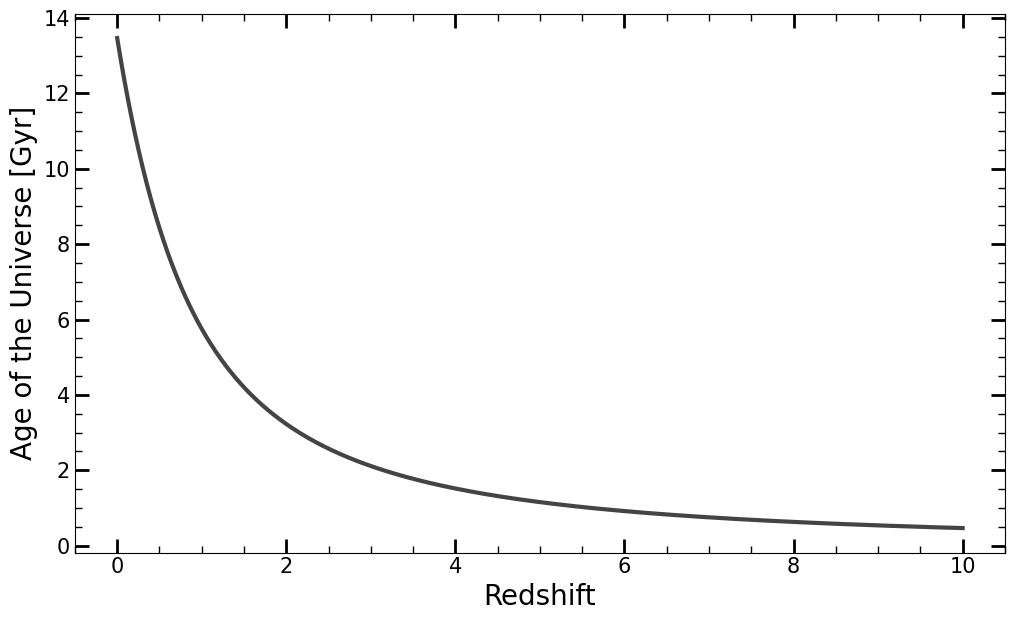

In [6]:
m= np.linspace(0, 10, 1000)
y= np.zeros(1000)

plt.figure()
for i in range(y.size):
    y[i]= age(m[i], H0).value
plt.plot(m, y, color='#444444', lw=3)
plt.ylabel('Age of the Universe [Gyr]')
plt.xlabel('Redshift');

In [7]:
#Now, using astropy
from astropy.cosmology import LambdaCDM

cosmo= LambdaCDM(H0=H0, Om0=Om0, Ode0=Ode0)

print('Age of the universe:', cosmo.age(0))

Age of the universe: 13.466983947061877 Gyr


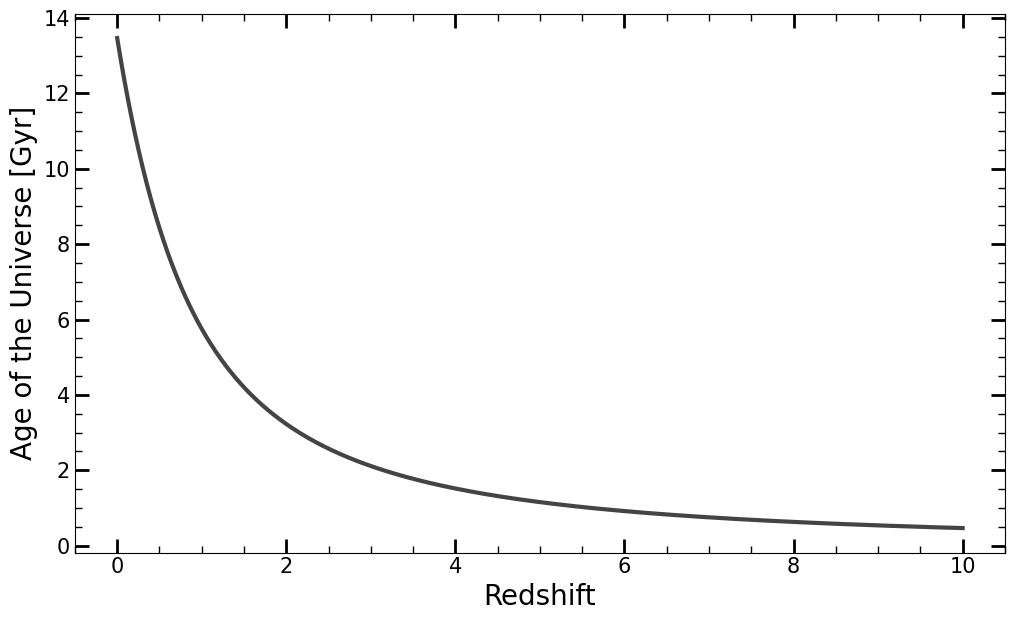

In [8]:
m= np.linspace(0, 10, 1000)

plt.figure()
plt.plot(m, cosmo.age(m), color='#444444', lw=3)
plt.ylabel('Age of the Universe [Gyr]')
plt.xlabel('Redshift');